In [5]:
import os
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def load_img(img, mode='RGB'):
    base_path = './../image'
    if mode == 'RGB':
        img = cv.imread(os.path.join(base_path, img))
    else:
        img = cv.imread(os.path.join(base_path, img), cv.IMREAD_GRAYSCALE)

    if img is None:
        print('Image load failed!')
        sys.exit()
    return img
    
def show_imgs(imgs, mode='RGB'):
    plt.figure(figsize=(12, 10))
    t_len = len(imgs)
    if mode == 'RGB':
        for i, img in enumerate(imgs):
            plt.subplot(1, t_len, i+1)
            plt.imshow(img)
            plt.xticks([])
            plt.yticks([])
    else:
        for i, img in enumerate(imgs):
            plt.subplot(1, t_len, i+1)
            plt.imshow(img, cmap='gray')
            plt.xticks([])
            plt.yticks([])
    
    plt.show()


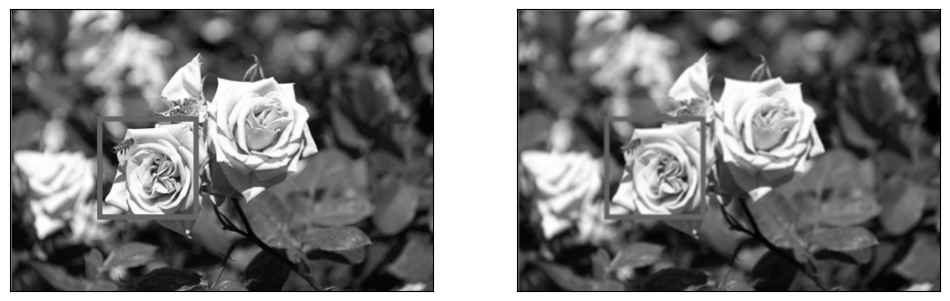

In [6]:
src = load_img('rose.bmp', 'g')
dst = cv.blur(src,(3,3))

show_imgs([src, dst], 'gray')

- blur

In [22]:
src = load_img('rose.bmp', 'g')
cv.imshow('src', src)

for ksize in (3, 5, 7):
    dst = cv.blur(src, (ksize, ksize))
    desc = 'Mean: {}x{}'.format(ksize, ksize)
    cv.putText(dst, desc, (10, 30), cv.FONT_HERSHEY_SIMPLEX,
               1.0, 0, 1, cv.LINE_AA)

    cv.imshow('dst', dst)
    cv.waitKey(0)
cv.destroyAllWindows()

- Gaussian Blur

In [8]:
src = load_img('rose.bmp', 'g')

cv.imshow('src', src)

for sigma in range(1, 6):
    dst = cv.GaussianBlur(src, (0, 0), sigma)
    desc = 'Sigma: {}'.format(sigma)
    cv.putText(dst, desc, (10, 30), cv.FONT_HERSHEY_SIMPLEX,
               1.0, 0, 1, cv.LINE_AA)

    cv.imshow('src', dst)
    cv.waitKey(0)

cv.destroyAllWindows()

- sharpening

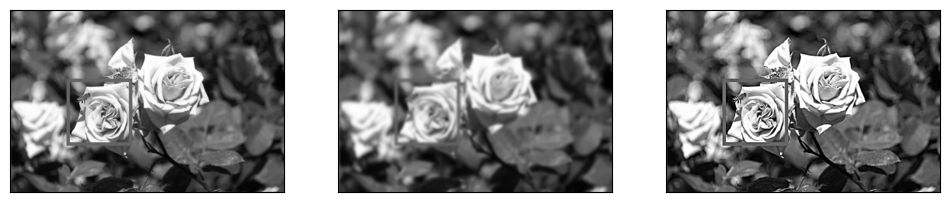

In [13]:
src = load_img('rose.bmp', 'g')
blr = cv.GaussianBlur(src, (0, 0), 2)
dst = np.clip(2.*src - blr, 0, 255).astype(np.uint8)

show_imgs([src, blr, dst], 'gray')

- color

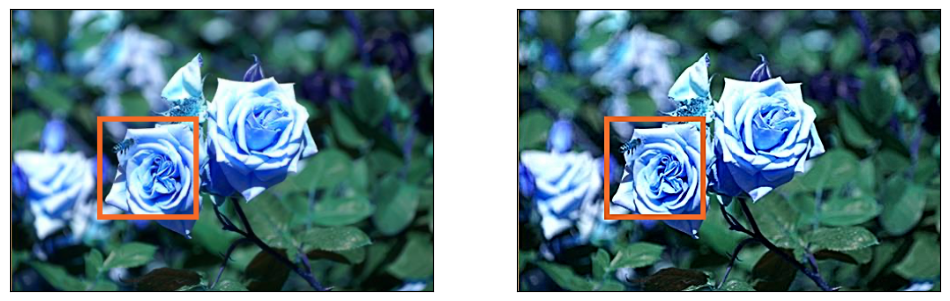

In [17]:
src = load_img('rose.bmp', 'RGB')

src_ycrcb = cv.cvtColor(src, cv.COLOR_BGR2YCrCb)

src_f = src_ycrcb[:, :, 0].astype(np.float32)
blr = cv.GaussianBlur(src_f, (0, 0), 2)
src_ycrcb[:, :, 0] = np.clip(2.*src_f - blr, 0, 255).astype(np.uint8)

dst = cv.cvtColor(src_ycrcb, cv.COLOR_YCrCb2BGR)

show_imgs([src, dst], 'RGB')

- Median Filter

In [18]:
src = load_img('noise.bmp', 'g')
dst = cv.medianBlur(src, 3)

show_imgs([src, dst], 'gray')

Image load failed!


[ WARN:0@979.969] global loadsave.cpp:241 findDecoder imread_('./../image/noise.bmp'): can't open/read file: check file path/integrity


SystemExit: 

/home/sangbeom/venv/opencv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


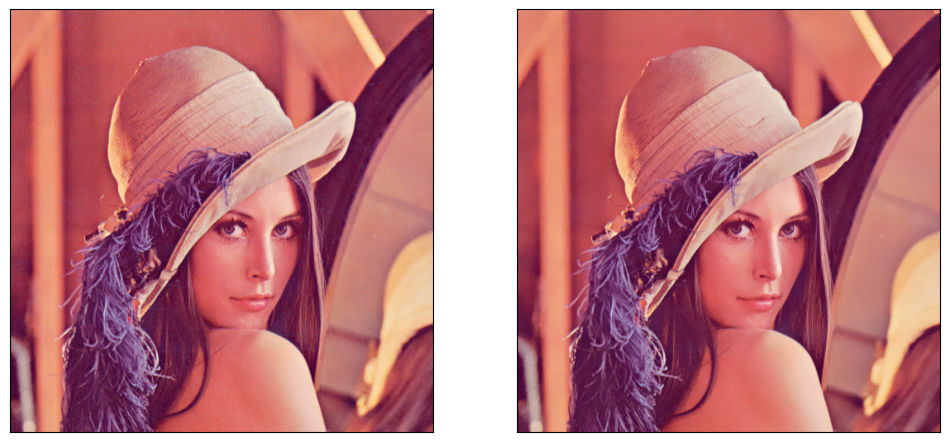

In [20]:
src = load_img('lenna.bmp', 'RGB')
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
dst = cv.bilateralFilter(src, -1, 10, 5)

show_imgs([src, dst], 'RGB')

- Cartoon Filter (Canny Edge Detection)

In [21]:
def cartoon_filter(img):
    h, w = img.shape[:2]
    img2 = cv.resize(img, (w//2, h//2))

    blr = cv.bilateralFilter(img2, -1, 20, 7)
    edge = 255 - cv.Canny(blr, 80, 120)
    edge = cv.cvtColor(edge, cv.COLOR_GRAY2BGR)

    dst = cv.bitwise_and(blr, edge)
    dst = cv.resize(dst, (w, h), interpolation=cv.INTER_NEAREST)
    return dst

def pencil_sketch(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blr = cv.GaussianBlur(gray, (0, 0), 3)
    dst = cv.divide(gray, blr, scale=255)
    return dst

In [22]:
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print('Camera open failed!')
    sys.exit()

cam_mode = 0 
while True:
    ret, frame = cap.read()
    if not ret:
        print('Frame read failed!')
        break

    if cam_mode==1:
        frame = cartoon_filter(frame)
    elif cam_mode==2:
        frame = pencil_sketch(frame)
        frame = cv.cvtColor(frame, cv.COLOR_GRAY2BGR)

    cv.imshow('frame', frame)
    key = cv.waitKey(1)
    if key == 27:
        break
    elif key == ord('c'):
        cam_mode = 1
    elif key == ord('p'):
        cam_mode = 2

cap.release()
cv.destroyAllWindows()